# ShallowMind 
## An exploratory endeavor into AI Chess


#### Download libraries that could aid the process

In [ ]:
#!pip install python-chess
#!pip install pgnparser
#!pip install pgnlib
#!pip install ipython-autotime ### time is becoming an issue...
#!pip install pystockfish
#!pip install stockfish

#### Import libraries for EDA, and processing

In [2]:
import chess
import pgn
from pystockfish import *

from stockfish import Stockfish

import pandas as pd
import numpy as np

import itertools

### Useful sources of Chess game data - 
Chess GrandMaster games: https://chess-db.com/public/downloads/gamesfordownload.jsp - 275,606 games


#### Note parsing pgn file data returns only the first game in the file, limited documentation availble for further explorating.
#### More processing required to access game lines and results.

In [3]:
import chess.pgn
pgn_file = open("pgnprepro.pgn")
first_game = chess.pgn.read_game(pgn_file)

print(f"{first_game.mainline_moves()}\n") #fancy built in method for accessing the moves


1. d4 e6 2. c4 d5 3. Nf3 Nf6 4. Nc3 Bb4 5. Bg5 h6 6. Bxf6 Qxf6 7. e3 O-O 8. Rc1 dxc4 9. Bxc4 c5 10. O-O cxd4 11. Ne4 Qe7 12. exd4 Nc6 13. Qe2 Bd7 14. a3 Bd6 15. Rfd1 Rad8 16. Qe3 Rfe8 17. b4 a6 18. Be2 Nb8 19. Ne5 Ba4 20. Rd2 Bxe5 21. dxe5 Rxd2 22. Qxd2 Rd8 23. Qb2 Bc6 24. Nd6 Bd5 25. f4 Nc6 26. a4 Qc7 27. b5 Qb6+ 28. Kf1 axb5 29. axb5 Ne7 30. Qc3 Rf8 31. Qc5 Qa5 32. Rd1 Qa2 33. g3 f6 34. exf6 Rxf6 35. Qc3 Qa7 36. Ne8 Rf7 37. Bh5 g6 38. Nf6+ Rxf6 39. Qxf6 gxh5 40. Qxe7 Bc4+ 41. Kg2 Bd5+ 42. Kh3 Qa2 43. Rxd5 Qxd5 44. Kh4 Qxb5 45. Qxe6+ Kg7 46. f5 Qc6 47. Qe7+ Kg8 48. Kxh5 b5 49. g4 b4 50. Qxb4 Qc7 51. Qb3+ Kh8 52. Qe6 Qf7+ 53. Qg6 Qc7 54. Qxh6+ Kg8 55. Qe6+ Kh8 56. Qe8+ Kh7 57. h4 Qb7 58. Qg6+ Kh8 59. Qh6+ Kg8 60. Qe6+ Kh8 61. g5 Qf7+ 62. g6 Qf8 63. g7+



#### Work-around for accesing moves and results

In [29]:
game_list = [line for line in open('GMallboth.pgn')] 

all_moves_list = []
i = 11
while i <= (len(game_list)/300):           ###### NOTE: '/100' only using 1% of the data availible from grandmasters
    all_moves_list.append(game_list[i])
    i += 16
    
    
all_results = []
i = 13
while i <= (len(game_list)/300):
    all_results.append(game_list[i])
    i += 16
    
all_openings = []
i = 7
while i <= (len(game_list)/300):
    all_openings.append(game_list[i])
    i += 16

In [30]:
(all_moves_list[0]), (all_results[0]), (all_openings[0])

('1. d4 e6 2. c4 d5 3. Nf3 Nf6 4. Nc3 Bb4 5. Bg5 h6 6. Bxf6 Qxf6 7. e3 O-O 8. Rc1 dxc4 9. Bxc4 c5 10. O-O cxd4 11. Ne4 Qe7 12. exd4 Nc6 13. Qe2 Bd7 14. a3 Bd6 15. Rfd1 Rad8 16. Qe3 Rfe8 17. b4 a6 18. Be2 Nb8 19. Ne5 Ba4 20. Rd2 Bxe5 21. dxe5 Rxd2 22. Qxd2 Rd8 23. Qb2 Bc6 24. Nd6 Bd5 25. f4 Nc6 26. a4 Qc7 27. b5 Qb6+ 28. Kf1 axb5 29. axb5 Ne7 30. Qc3 Rf8 31. Qc5 Qa5 32. Rd1 Qa2 33. g3 f6 34. exf6 Rxf6 35. Qc3 Qa7 36. Ne8 Rf7 37. Bh5 g6 38. Nf6+ Rxf6 39. Qxf6 gxh5 40. Qxe7 Bc4+ 41. Kg2 Bd5+ 42. Kh3 Qa2 43. Rxd5 Qxd5 44. Kh4 Qxb5 45. Qxe6+ Kg7 46. f5 Qc6 47. Qe7+ Kg8 48. Kxh5 b5 49. g4 b4 50. Qxb4 Qc7 51. Qb3+ Kh8 52. Qe6 Qf7+ 53. Qg6 Qc7 54. Qxh6+ Kg8 55. Qe6+ Kh8 56. Qe8+ Kh7 57. h4 Qb7 58. Qg6+ Kh8 59. Qh6+ Kg8 60. Qe6+ Kh8 61. g5 Qf7+ 62. g6 Qf8 63. g7+ \n',
 '1-0\n',
 '[WhiteElo "2764"]\n')

#### Function that cleans up the move string string

In [31]:
def get_move_list(move_string): #### input is a string 
    '''
    Takes a move string that was striped from a PGN format, and removes unwanted characters and conserves SAN format.
    
    Input: String of plain text moves in string format
    Output: List of SAN moves
    
    '''
    testing = move_string 
    testing = testing[0:-2]  ### remove last 2 characters == '\n'
    testing = testing.split('. ')
    
    for i in range(len(testing)):
        testing[i] = testing[i].split(' ')
    for i in testing:
        try:
            del(i[2])
        except:
            continue
    del(testing[0])

    simplelist = list(itertools.chain.from_iterable(testing))
    return(simplelist)

In [32]:
def clean_fen(string):
    '''
    Takes a Forsyth-Edwards Notation, with extraneous features, and simplifies it to a list of piece and position on the board [r,n,b,q,k,b,n,r,p,p,p,p,p,p,p,p,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,P,P,P,P,P,P,P,P,R,N,B,Q,K,B,N,R]
    
    Input: FEN string
    Output: 64 length list of strings, with piece position encoded
    '''
    string = string.replace('8','1'*8)
    string = string.replace('7','1'*7)
    string = string.replace('6','1'*6)
    string = string.replace('5','1'*5)
    string = string.replace('4','1'*4)
    string = string.replace('3','1'*3)
    string = string.replace('2','1'*2)
    string = string.replace('1','1'*1)
    string = string.replace('/','')
    string_list = [i for i in string]
    string_array = np.asarray(string_list)
    return(string_array)

In [33]:
#x = [get_move_list(game) for game in ep_game]


In [34]:
#ep_game = ['1. d4 e6 2. c4 d5 3. Nf3 Nf6 4. Nc3 Bb4 5. Bg5 h6 6. Bxf6 Qxf6 7. e3 O-O 8. Rc1 dxc4 9. Bxc4 c5 10. O-O cxd4 11. Ne4 Qe7 12. exd4 Nc6 13. Qe2 Bd7 14. a3 Bd6 15. Rfd1 Rad8 16. Qe3 Rfe8 17. b4 a6 18. Be2 Nb8 19. Ne5 Ba4 20. Rd2 Bxe5 21. dxe5 Rxd2 22. Qxd2 Rd8 23. Qb2 Bc6 24. Nd6 Bd5 25. f4 Nc6 26. a4 Qc7 27. b5 Qb6+ 28. Kf1 axb5 29. axb5 Ne7 30. Qc3 Rf8 31. Qc5 Qa5 32. Rd1 Qa2 33. g3 f6 34. exf6 Rxf6 35. Qc3 Qa7 36. Ne8 Rf7 37. Bh5 g6 38. Nf6+ Rxf6 39. Qxf6 gxh5 40. Qxe7 Bc4+ 41. Kg2 Bd5+ 42. Kh3 Qa2 43. Rxd5 Qxd5 44. Kh4 Qxb5 45. Qxe6+ Kg7 46. f5 Qc6 47. Qe7+ Kg8 48. Kxh5 b5 49. g4 b4 50. Qxb4 Qc7 51. Qb3+ Kh8 52. Qe6 Qf7+ 53. Qg6 Qc7 54. Qxh6+ Kg8 55. Qe6+ Kh8 56. Qe8+ Kh7 57. h4 Qb7 58. Qg6+ Kh8 59. Qh6+ Kg8 60. Qe6+ Kh8 61. g5 Qf7+ 62. g6 Qf8 63. g7+ ', '1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. Nc3 e5 6. Ndb5 d6 7. Bg5 a6 8. Na3 b5 9. Bxf6 gxf6 10. Nd5 f5 11. c3 Bg7 12. Bd3 Be6 13. Qh5 O-O 14. O-O f4 15. g4 Rb8 16. Nc2 Qd7 17. f3 a5 18. Na3 b4 19. Nb5 bxc3 20. bxc3 Ne7 21. a4 Rfc8 22. Rad1 Rc5 23. c4 Re8 24. Kh1 Ng6 25. Rfe1 Rb8 26. Bf1 Bxd5 27. exd5 Qe7 28. g5 Rbc8 29. Re4 f5 30. gxf6ep Qxf6 31. Bh3 Rd8 32. Be6+ Kh8 33. Bf5 Nf8 34. Rg1 Qh6 35. Qxh6 Bxh6 36. Re2 Rxc4 37. Reg2 Ng6 38. Bxg6 hxg6 39. Rxg6 Bf8 40. R6g5 Kh7 41. Rh5+ Bh6 42. Rg4 Rc5 43. Kg2 Rxd5 44. Nc3 Rd2+ 45. Kh3 d5 46. Rxe5 Rd3 47. Re7+ Kh8 48. Re6 Bg7 49. Ne2 Rxf3+ 50. Kg2 Re3 51. Nxf4 d4 52. Rxg7 Rxe6 53. Nxe6 Rd6 54. Rg6 d3 55. Nf4 Rd4 56. Nxd3 Rxd3 57. Rg5 Rd2+ 58. Kg3 Rd3+ 59. Kh4 Rd4+ 60. Rg4 Rb4 61. Kg5 Rb2 62. h4 Kg7 63. Kh5+ Kf6 64. Rg5 Rb8 65. Rxa5 Rh8+ 66. Kg4 Rc8 67. Rf5+ Kg6 68. a5 Rc1 69. h5+ Kg7 70. Kf4 Ra1 71. Rb5 Kh6 72. Ke4 Rd1 73. a6 Ra1 74. Rb6+ Kxh5 75. Kd5 Rc1 76. Rc6 Ra1 77. Kc5 Kg4 78. Kb6 Rb1+ 79. Kc7 Kf5 80. a7 Rb4 81. Re6 Rb1 82. Re2 Kg6'] 


#### Function that clean up the results

In [35]:
def white_results(result_string_list):
    '''
    Reformats and standardizes stripped result info from chess game in PGN/TXT format
    
    Input: list of strings - (results text with \n)
    Output: win, lose, draw in list format
    
    '''
    white_result_list = []
    for i in range(len(result_string_list)):
            result = result_string_list[i][:-1]
            result = result.replace('1-0', 'win')
            result = result.replace('0-1', 'lose')
            result = result.replace('1/2-1/2', 'draw')
            white_result_list.append(result)
    return(white_result_list)

In [36]:
%%time
white_test = white_results(all_results)

CPU times: user 1.31 ms, sys: 389 µs, total: 1.7 ms
Wall time: 1.95 ms


#### Converts string of all the game moves into lists of moves in standard algebraic notation (san) 

In [37]:
%%time
all_san_list = [get_move_list(game) for game in all_moves_list]
all_san_list[0][0:10]

CPU times: user 179 ms, sys: 18 ms, total: 197 ms
Wall time: 213 ms


['d4', 'e6', 'c4', 'd5', 'Nf3', 'Nf6', 'Nc3', 'Bb4', 'Bg5', 'h6']

#### Move games from results pool to sub-pool (win, lose, or draw)

In [38]:
white_win = []
white_lose = []
white_draw = []

for i in range(len(white_test)):
    if white_test[i] == 'win':
        white_win.append(all_san_list[i])
    elif white_test[i] == 'lose':
        white_lose.append(all_san_list[i])
    else:
        white_draw.append(all_san_list[i])
print(len(white_win), len(white_lose), len(white_draw))

304 185 429


In [39]:
def clean_fen(string):
    '''
    Takes a fen with extraneous features  
    '''
    string = string.replace('8','1'*8)
    string = string.replace('7','1'*7)
    string = string.replace('6','1'*6)
    string = string.replace('5','1'*5)
    string = string.replace('4','1'*4)
    string = string.replace('3','1'*3)
    string = string.replace('2','1'*2)
    string = string.replace('1','1'*1)
    string = string.replace('/','')
    string_list = [i for i in string]
    string_array = np.asarray(string_list) ############## Change in VM Instance
    return(string_array)

In [ ]:
def get_bitwise(board_state):
    bs = board_state #test ---- #First posiiton tuple  #winning_position[0][0] - for i in range:
    r_ray = np.zeros(64)
    n_ray = np.zeros(64)
    b_ray = np.zeros(64)
    q_ray = np.zeros(64)
    k_ray = np.zeros(64)
    p_ray = np.zeros(64)
    for i in range(64):
        if bs[i] == 'r':
            r_ray[i] = -1
        if bs[i] == 'R':
            r_ray[i] = 1 
        
        if bs[i] == 'b':
            b_ray[i] = -1
        if bs[i] == 'B':
            b_ray[i] = 1
        
        if bs[i] == 'n':
            n_ray[i] = -1
        if bs[i] == 'N':
            n_ray[i] = 1 
    
        if bs[i] == 'q':
            q_ray[i] = -1
        if bs[i] == 'Q':
            q_ray[i] = 1
    
        if bs[i] == 'k':
            k_ray[i] = -1
        if bs[i] == 'K':
            k_ray[i] = 1 
        
        if bs[i] == 'p':
            p_ray[i] = -1
        if bs[i] == 'P':
            p_ray[i] = 1 
    master_ray = np.array((r_ray, n_ray, b_ray, q_ray, k_ray, p_ray))
    return(master_ray)

In [41]:
def get_white_win_bs(game): ### i from white_win 
    '''
    Input: 
    '''
    board = chess.Board()

    board_state = None
    game_board_states = []


    for i in range(len(game)):
        bs = board.board_fen() ### creates current board state, in FEN "rnbqkbnr/pppppppp....
        board_state = np.array(clean_fen(bs)) ### return
        game_board_states.append(board_state)
        board.push_san(game[i])
        
    white_wins = []
    i = 0
    while i < len(game_board_states):
        try:
            white_wins.append((get_bitwise(game_board_states[i]).astype(int), get_bitwise(game_board_states[i + 1]).astype(int)))
            i += 2
        except:
            break
    return(white_wins)

In [42]:
%%time
white_win_bs = []
for i in range(len(white_win)):
    white_win_bs.extend(get_white_win_bs(white_win[i]))
white_win_bs[0][0]

CPU times: user 12.2 s, sys: 221 ms, total: 12.4 s
Wall time: 13.8 s


array([[-1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1],
       [ 0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0],
       [ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  

In [52]:
white_win_bs[0][0][0].astype('int8')

array([-1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1], dtype=int8)

In [25]:
def get_white_lose_bs(game): 

    board = chess.Board()

    board_state = None
    game_board_states = []

    for i in range(len(game)):
        bs = board.board_fen() ### creates current board state, in FEN "rnbqkbnr/pppppppp....
        board_state = np.array(clean_fen(bs)) ### return
        game_board_states.append(board_state)
        board.push_san(game[i])
    

    white_losses = []
    i = 1
    while i < len(game_board_states):
        try:
            white_losses.append((get_bitwise(game_board_states[i]).astype(int), get_bitwise(game_board_states[i + 1]).astype(int)))
            i += 2
        except:
            break
    return(white_losses)

In [ ]:
%%time
white_lose_bs = []
for i in range(len(white_lose)):
    white_lose_bs.extend(get_white_lose_bs(white_lose[i]))

In [ ]:
winning_position = white_lose_bs + white_win_bs

In [ ]:
winning_position[0]

In [ ]:
x = np.empty(64)

In [ ]:
winning_position_df = pd.DataFrame(winning_position)
winning_position_df[0][0]

In [ ]:
winning_position_df.info()

In [ ]:
def get_draw_bs(game): 
    
    board = chess.Board()

    board_state = None
    game_board_states = []

    for i in range(len(game)):
        bs = board.board_fen() ### creates current board state, in FEN "rnbqkbnr/pppppppp....
        arr = np.array(clean_fen(bs))
        game_board_states.append(arr)  
        board.push_san(game[i])
    
    draws = []     
    for i in range(len(game_board_states)):
        try:
            draws.append((game_board_states[i], game_board_states[i+1]))
        except:
            break
    return(draws)

In [ ]:
draw_list = []
for i in range(len(white_draw)):
    draw_list.extend(get_draw_bs(white_draw[i]))

In [ ]:
white_draw_df = pd.DataFrame(draw_list, columns = ['before', 'after']) ######### Should 
white_draw_df.head()

#### Now that we have the moves in san, lets generate the board states in a (1x64) array 
#### Creating a function that cleans up FEN notation

#### Creating function that converts moves to board states as Forsyth Enumerated Notation (FEN) 

In [ ]:
'''
def get_fen_state(move_list): ### i from all move_list 
    game = move_list
    board = chess.Board()

    fen_states = []
    for move in game:
        try:
            bs = board.board_fen()
            fen_states.append(clean_fen(bs))
            board.push_san(move)
        except:
            continue
    return(fen_states)
'''

#### Alternative format for fen... just in case

In [ ]:
def get_board_state_string(move_list): 
    game = move_list
    board = chess.Board()

    board_states = []
    for move in game:
        try:
            board_states.append(board.board_fen())
            board.push_san(move)
        except:
            continue
    return(board_states)

### Format for Array

In [ ]:
def get_board_state_array(move_list): ### i from all move_list 
    game = move_list
    board = chess.Board()
    #game = all_san_list[0]   


    board_state_list = []

    for move in game:
        try:
            bs = board.board_fen() ### creates current board state, in FEN "rnbqkbnr/pppppppp....
            board_array = np.array(clean_fen(bs)) ### return
            board_state_list.append(board_array)
            board.push_san(move)
        except:
            board_state_list.append(0)
            break
    return(board_state_list)

#### En Passante cleaner

In [ ]:
'''
BS = []
x = [get_move_list(game) for game in ep_game]

for y in x:
    z = get_board_state_array(y)
    if z[-1] != 0:
        BS.append(z)
BS
'''

# Testing Ground / Python-chess pla

In [ ]:
winning_position[0][0]

# Bitwise -> FEN

In [ ]:
game = winning_position[0][0]
game = game.tolist()

In [ ]:
#game

In [ ]:
game # range(j, 6)
fena = np.zeros(64, dtype=int) #((r_ray, n_ray, b_ray, q_ray, k_ray, p_ray))
for j in range(6):    
    for i in range(64):
        if j == 0:
            fena[i] = game[j][i]
        if j == 1:
            fena[i] += game[j][i] * (j+1)
        if j == 2:
            fena[i] += game[j][i] * (j+1)
        if j == 3:
            fena[i] += game[j][i] * (j+1)
        if j == 4:
            fena[i] += game[j][i] * (j+1)
        if j == 5:
            fena[i] += game[j][i] * (j+1)
        
fena = fena.astype(str)

fena = np.char.replace(fena, '1', 'R')
fena = np.char.replace(fena, '-R', 'r')

fena = np.char.replace(fena, '2', 'N')
fena = np.char.replace(fena, '-N', 'n')

fena = np.char.replace(fena, '3', 'B')
fena = np.char.replace(fena, '-B', 'b')

fena = np.char.replace(fena, '4', 'Q')
fena = np.char.replace(fena, '-Q', 'q')

fena = np.char.replace(fena, '5', 'K')
fena = np.char.replace(fena, '-K', 'k')

fena = np.char.replace(fena, '6', 'P')
fena = np.char.replace(fena, '-P', 'p')

fena = np.char.replace(fena, '0', '1') # Seems wierd, but i need to add up the open spaces some how....

fene = list(itertools.chain.from_iterable(fena))

# Need to break chain at 8 characters
fene.insert(8 , '/') 
fene.insert(17, '/')
fene.insert(26, '/')
fene.insert(35, '/')
fene.insert(44, '/')
fene.insert(53, '/')
fene.insert(62, '/')


# Replacing consecutive empty spaces with the sum
fene = ''.join(fene)
fene = fene.replace('1' * 8, '8')
fene = fene.replace('1' * 7, '7')
fene = fene.replace('1' * 6, '6')
fene = fene.replace('1' * 5, '5')
fene = fene.replace('1' * 4, '4')
fene = fene.replace('1' * 3, '3')
fene = fene.replace('1' * 2, '2')
fene = fene.replace('1' * 1, '1')
fene # Works....

In [ ]:
'''
len(all_san_list)
#xtea_df = pd.DataFrame(xtea)
all_san_list.pop(252984)
len(all_san_list)
'''

In [ ]:
'''
data_with_moves
'''

In [ ]:
'''
data_with_moves[473].value_counts()
'''

In [ ]:
'''
data_with_moves.loc[data_with_moves[473] == 'Rh2']
'''

#### using build in pgn methods

In [ ]:

import chess.pgn
pgn_file = open("GMallboth.pgn")
first_game = chess.pgn.read_game(pgn_file)
'''
# def generate_BStates(game): 
board = chess.Board()
game_1 = []
white_move = []
black_move = []
count = 0

for m in list(first_game.mainline_moves()):
    if count % 2 == 0:
        white_move.append(m)
    else:
        black_move.append(m)
    count += 1

for i in range(len(white_move)):
    print(board.board_fen())
    try:
        board.push(white_move[i])
    except:
        continue
    try:
        board.push(black_move[i])
    except:
        board.push(chess.Move.from_uci('0000'))
        continue
        '''
node = first_game



In [ ]:
GM_board = chess.Board()

In [ ]:
# GM_Board =

In [ ]:
next_node = node.variation(0)
GM_move = str(node.board().san(next_node.move))
GM_board.push_san(GM_move)
print(type(GM_board))

In [ ]:
'''
with open("GMallboth.pgn") as f:
    line = f.readline()
    while line:
        print(line, end="")
        line = f.readline()
'''

In [ ]:
board = chess.Board()


In [ ]:
['d4 e6', 'c4 d5', 'Nf3 Nf6', 'Nc3 Bb4', 'Bg5 h6', 'Bxf6 Qxf6'] #, e3 O-O 8. Rc1 dxc4 9. Bxc4 c5 10. O-O cxd4 11. Ne4 Qe7 12. exd4 Nc6 13. Qe2 Bd7 14. a3 Bd6 15. Rfd1 Rad8 16. Qe3 Rfe8 17. b4 a6 18. Be2 Nb8 19. Ne5 Ba4 20. Rd2 Bxe5 21. dxe5 Rxd2 22. Qxd2 Rd8 23. Qb2 Bc6 24. Nd6 Bd5 25. f4 Nc6 26. a4 Qc7 27. b5 Qb6+ 28. Kf1 axb5 29. axb5 Ne7 30. Qc3 Rf8 31. Qc5 Qa5 32. Rd1 Qa2 33. g3 f6 34. exf6 Rxf6 35. Qc3 Qa7 36. Ne8 Rf7 37. Bh5 g6 38. Nf6+ Rxf6 39. Qxf6 gxh5 40. Qxe7 Bc4+ 41. Kg2 Bd5+ 42. Kh3 Qa2 43. Rxd5 Qxd5 44. Kh4 Qxb5 45. Qxe6+ Kg7 46. f5 Qc6 47. Qe7+ Kg8 48. Kxh5 b5 49. g4 b4 50. Qxb4 Qc7 51. Qb3+ Kh8 52. Qe6 Qf7+ 53. Qg6 Qc7 54. Qxh6+ Kg8 55. Qe6+ Kh8 56. Qe8+ Kh7 57. h4 Qb7 58. Qg6+ Kh8 59. Qh6+ Kg8 60. Qe6+ Kh8 61. g5 Qf7+ 62. g6 Qf8 63. g7+"


In [ ]:
board.push_san('d4')

In [ ]:
board.board_fen()

In [ ]:
board= 'rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR'

In [ ]:
board.set_board_fen('rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR')

In [ ]:
board

In [ ]:
len(list(first_game.mainline_moves()))

In [ ]:
len(white_move)

In [ ]:
df= pd.DataFrame()

In [ ]:
import chess.pgn
pgn_file = open("GMallboth.pgn")
first_game = chess.pgn.read_game(pgn_file)

# def generate_BStates(game): 
board = chess.Board()
game_1 = []
white_move = []
black_move = []
count = 0

for m in list(first_game.mainline_moves()):
    if count % 2 == 0:
        white_move.append(m)
    else:
        black_move.append(m)
    count += 1

for i in range(len(white_move)):
    print(board.board_fen())
    board.push(white_move[i])
    try:
        board.push(black_move[i])
    except:
        board.push(chess.Move.from_uci('0000'))
        continue
board


#for i in range(len(list(first_game.mainline_moves()))):
 #   board.push()
  #  boa
#board.push(move.from_uci('d2d4'))
#board.push_san('Nf6')


# Testing pickle

In [ ]:
import pickle 
#with open('array_data.p', 'wb') as write_file:
 #   pickle.dump(all_board_state_list, write_file)

In [ ]:
with open('', 'rb') as read_file:
    data = pickle.load(read_file)

In [ ]:
data

In [ ]:
test_df = pd.DataFrame(all_board_state_list)

# Testing DEEP Learning

In [260]:
import keras
from matplotlib import pyplot as plt
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from keras.regularizers import l2
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [263]:
#sgd = SGD(lr=0.001, decay=1e-15, momentum=0.7, nesterov=True)

dim_input = X.shape[1]


#sgd = SGD(lr=0.001, decay=1e-15, momentum=0.7, nesterov=False)

model = Sequential()
act = keras.layers.advanced_activations.LeakyReLU(alpha=0.01) 
model.add(Dense(768, input_dim= dim_input, init='normal', activation='relu'))
model.add(Dense(1024, init='normal', activation='elu'))
model.add(Dense(64, init='normal', activation='elu'))
model.add(Dense(1, init='normal', activation= 'linear'))
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

NameError: name 'X' is not defined

In [ ]:
board = chess.Board()

In [ ]:
board

In [ ]:
list(board.generate_legal_moves())

In [ ]:
chess.Move.from_uci()

In [ ]:
board = chess.Board()

In [ ]:
for i in board.generate_legal_moves():
    board.push(chess.Move.from_uci(i))
    print(board)
    board = chess.Board()

In [ ]:
from stockfish import Stockfish
#pip install stockfish

In [ ]:
chess.Board()

In [ ]:
movie = []
for i in list(board.generate_legal_moves()):
    movie.append(str(i))
movie

In [67]:
board = chess.Board()
for i in list(board.generate_legal_moves()):
    board = chess.Board()
    move = chess.Move.from_uci(str(i))
    badi = board.push(move)
badi
    

AssertionError: push() expects move to be pseudo-legal, but got g1f3 in rnbqkbnr/pppppppp/8/8/8/7N/PPPPPPPP/RNBQKB1R

In [ ]:
list(board.generate_legal_moves())

In [ ]:
chess.Board()

In [ ]:
from stockfish import Stockfish

stockfish = Stockfish("Desktop/stockfish-11-mac/Mac/stockfish-11-64")

In [298]:
%%time
import chess
import chess.engine

engine = chess.engine.SimpleEngine.popen_uci("Desktop/stockfish-11-mac/Mac/stockfish-11-64")

#board = chess.Board()
#info = engine.analyse(board, chess.engine.Limit(time=0.1))
#print("Score:", info["score"])
# Score: +95

board = chess.Board()

print(board)
info = engine.analyse(board, chess.engine.Limit(depth=5))
print("Score:", info["score"])
# Score: #+1

engine.quit()

FileNotFoundError: [Errno 2] No such file or directory: 'Desktop/stockfish-11-mac/Mac/stockfish-11-64': 'Desktop/stockfish-11-mac/Mac/stockfish-11-64'

In [ ]:
white_win[0]

# New APPROACH!!!

### Will obtain positional (cp) scores by feeding stockfish chess engine positions
### Then - I will train the ANN to approximate the RNN evaluation of positional score
### THEN! - I will evaulate the avalible legal moves given the current state and select the best move.

In [ ]:
def get_white_win(game): ### 1 win
    '''
    Input: 
    '''
    board = chess.Board()

    board_state = None
    game_board_states = []


    for i in range(len(game)):
        bs = board.board_fen() ### creates current board state, in FEN "rnbqkbnr/pppppppp....
        board_state = np.array(clean_fen(bs)) ### return
        game_board_states.append(board_state)
        board.push_san(game[i])
        
    white_wins = []
    i = 0
    while i < len(game_board_states):
        try:
            white_wins.append((get_bitwise(game_board_states[i]).astype(int), get_bitwise(game_board_states[i + 1]).astype(int)))
            i += 2
        except:
            break
    return(white_wins)

In [296]:
board = chess.Board()

In [297]:

engine = chess.engine.SimpleEngine.popen_uci("Desktop/stockfish-11-mac/Mac/stockfish-11-64")

#board = chess.Board()
#info = engine.analyse(board, chess.engine.Limit(time=0.1))
#print("Score:", info["score"])
# Score: +95

board = chess.Board()
print(board)
info = engine.analyse(board, chess.engine.Limit(depth=8))
print("Score:", info["score"])

engine.quit()

AttributeError: module 'chess' has no attribute 'engine'

In [ ]:
'''
1- FEN-state       Bitwise 8*8*6  Positional value (cps?)
__________________|_______________|_________________________-
Include tail?
    probably...
White win, white lose
'''

In [ ]:
white_wins[0]

# Playing game

In [299]:
#import pickle
import pandas as pd
import numpy as np
import chess
import pickle

import itertools
import os

import keras
from matplotlib import pyplot as plt
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.layers.core import Activation
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
import xgboost
import sklearn.model_selection
from sklearn.preprocessing import MinMaxScaler 

In [301]:
model = keras.models.load_model('prelim_model.h5')

In [154]:
#with open('bitwise_data.p', 'rb') as read_file:
 #   data = pickle.load(read_file)

In [165]:
#df = pd.DataFrame(data, columns = ['cp', 'bitwise'])

In [167]:
%%time
df['rook'] = [ df['bitwise'][i][0] for i in range(len(df)) ]
df['night'] = [ df['bitwise'][i][1] for i in range(len(df))]
df['bishop'] = [ df['bitwise'][i][2] for i in range(len(df))]
df['queen'] = [ df['bitwise'][i][3] for i in range(len(df))]
df['king'] = [ df['bitwise'][i][4] for i in range(len(df))]
df['pawn'] = [ df['bitwise'][i][5] for i in range(len(df))]




CPU times: user 34.6 s, sys: 840 ms, total: 35.5 s
Wall time: 36.5 s


0          [-1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0...
1          [-1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0...
2          [-1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0...
3          [-1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0...
4          [-1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0...
                                 ...                        
1173236    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1173237    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1173238    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1173239    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1173240    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: rook, Length: 1173241, dtype: object

In [189]:
rook_cols = []
for i in range(64):
    rook_cols.append('rook_'+ str(i))
    
night_cols = []
for i in range(64):
    night_cols.append('night_'+ str(i))

bishop_cols = []
for i in range(64):
    bishop_cols.append('bishop_'+ str(i))    
    
queen_cols = []
for i in range(64):
    queen_cols.append('queen_'+ str(i))
    
king_cols = []
for i in range(64):
    king_cols.append('king_'+ str(i))
    
pawn_cols = []
for i in range(64):
    pawn_cols.append('pawn_'+ str(i))

array([-1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1], dtype=int8)

In [187]:
%%time
for move in range(len(df)):
    for i in range(64):
        df[f'rook{i}'] = df['rook'][move][i]
        #df[f'night{i}'] = df['night'][move][i]
        #df[f'bishop{i}'] = df['bishop'][move][i]
        #df[f'queen{i}'] = df['queen'][move][i]
        #df[f'king{i}'] = df['king'][move][i]
        #df[f'pawn{i}'] = df['pawn'][move][i]
    
#df = df.drop(['bitwise', 'rook', 'night', 'bishop', 'queen', 'king', 'pawn'], axis = 1)

KeyboardInterrupt: 

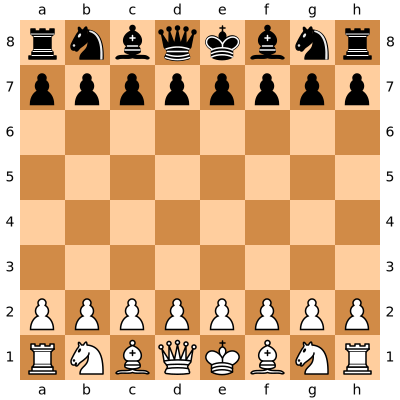

In [760]:
board = chess.Board()
board

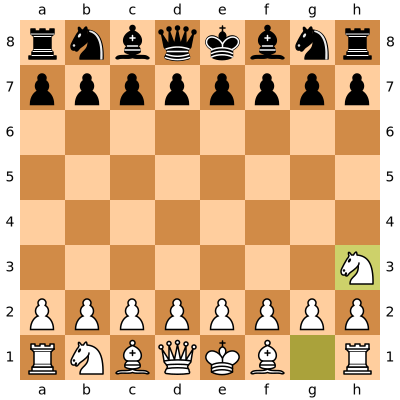

In [761]:
board.push(chess.Move.from_uci(move))
board

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


('g1h3', 5.149518013000488)


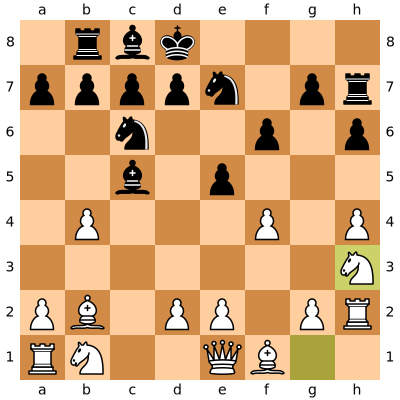

In [759]:
turn = 0
x = run_AI(board)
print(x)

move = x[0]

board.push(chess.Move.from_uci(move))
board

In [649]:
#current_board = chess.Board()

current_board = current_board
run_AI(current_board)

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


('b1c3', -0.20403319597244263)

In [425]:
%%time
def run_AI(board):
    legal_boards = []
    l = []
    turn = 0
    boardfen = board.fen()
    for move in [str(i) for i in list(board.legal_moves)]:
        current_board = chess.Board(boardfen)
    
        future_move = chess.Move.from_uci(str(move))
        current_board.push(future_move)
        current_board = str(current_board)
        current_board = current_board.replace('\n', ' ')
        current_board = current_board.replace('.', '1')
        current_board = current_board.split(' ')
        legal_boards.append((future_move, get_bitwise(current_board)))
    
    pred_df = pd.DataFrame(legal_boards, columns = ['move', 'bitwise'])
    pred_df['rook'] = [ pred_df['bitwise'][i][0] for i in range(len(pred_df)) ]
    pred_df['night'] = [ pred_df['bitwise'][i][1] for i in range(len(pred_df)) ]
    pred_df['bishop'] = [ pred_df['bitwise'][i][2] for i in range(len(pred_df)) ]
    pred_df['queen'] = [ pred_df['bitwise'][i][3] for i in range(len(pred_df)) ]
    pred_df['king'] = [ pred_df['bitwise'][i][4] for i in range(len(pred_df)) ]
    pred_df['pawn'] = [ pred_df['bitwise'][i][5] for i in range(len(pred_df)) ]
    pred_df = pred_df.drop('bitwise', axis=1)

    rook_cols = []
    for i in range(64):
        rook_cols.append('rook_'+ str(i))
    
    night_cols = []
    for i in range(64):
        night_cols.append('night_'+ str(i))

    bishop_cols = []
    for i in range(64):
        bishop_cols.append('bishop_'+ str(i))    
    
    queen_cols = []
    for i in range(64):
        queen_cols.append('queen_'+ str(i))
    
    king_cols = []
    for i in range(64):
        king_cols.append('king_'+ str(i))
    
    pawn_cols = []
    for i in range(64):
        pawn_cols.append('pawn_'+ str(i))

    dfr = pd.DataFrame(pred_df['rook'].values.tolist(), columns = rook_cols)
    dfn = pd.DataFrame(pred_df['night'].values.tolist(), columns = night_cols)
    dfb = pd.DataFrame(pred_df['bishop'].values.tolist(), columns = bishop_cols)
    dfq = pd.DataFrame(pred_df['queen'].values.tolist(), columns = queen_cols)
    dfk = pd.DataFrame(pred_df['king'].values.tolist(), columns = king_cols)
    dfp = pd.DataFrame(pred_df['pawn'].values.tolist(), columns = pawn_cols)


    df_merged = pd.merge(dfr, dfn, how='outer', right_index=True, left_index=True)
    df_merged = pd.merge(df_merged, dfb, how='outer', right_index=True, left_index=True)
    df_merged = pd.merge(df_merged, dfq, how='outer', right_index=True, left_index=True)
    df_merged = pd.merge(df_merged, dfk, how='outer', right_index=True, left_index=True)
    df_merged = pd.merge(df_merged, dfp, how='outer', right_index=True, left_index=True)

    if turn % 2 == True:
        df_merged['white_turn'] = 1
    else:
        df_merged['white_turn'] = 0
    
    move_and_score = []
    best_move = ('NaN', -13)
    for i in range(len(legal_boards)):
        m_and_s = (str(legal_boards[i][0]), np.asscalar(model.predict(df_merged)[i][0]))
        move_and_score.append(m_and_s)
        if m_and_s[1] > best_move[1]:
            best_move = m_and_s
    turn += 2 
    current_board = board
    return(best_move)

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 11.9 µs


/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.


('c2c4', 0.9305233359336853)

In [283]:
hf = h5py.File('lenet_weights.hdf5', 'r')
    # List all groups
data = hf.get('lenet_weights.hdf5').value


AttributeError: 'NoneType' object has no attribute 'value'

In [250]:
pred_df['night'][0]

array([ 0., -1.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [ ]:



df_merged.astype('int64')
df_merged

In [199]:
game = 5
# 1 = Boards
piece = 1 # night
legal_boards[game][1][piece]

array([ 0., -1.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.])

In [116]:
z = [str(i) for i in list(game_board.legal_moves)]
z

In [74]:
legal_boards

[]

In [78]:
chess.Board().fen()

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'

In [127]:
b = chess.Board()

In [118]:
legal_moves = [str(i) for i in list(b.legal_moves)]
legal_moves[0]

'g1h3'

In [292]:
b = chess.Board()
#b.push(chess.Move.from_uci('g1h3'))

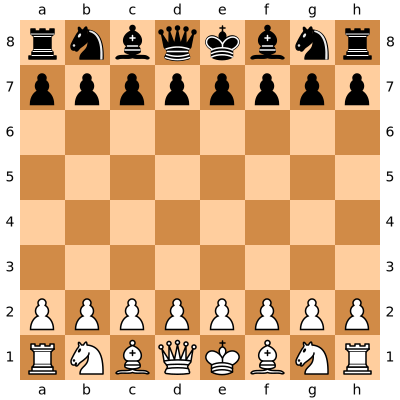

In [293]:
b

In [284]:
import h5py

In [285]:
f = h5py.File('lenet_weights.hdf5', 'r')

In [286]:
list(f.keys())

['activation_1',
 'activation_2',
 'activation_3',
 'activation_4',
 'convolution2d_1',
 'convolution2d_2',
 'dense_1',
 'dense_2',
 'flatten_1',
 'maxpooling2d_1',
 'maxpooling2d_2']

In [290]:
dset = f['activation_1']

In [291]:
dset

<HDF5 group "/activation_1" (0 members)>

In [283]:
hf = h5py.File('lenet_weights.hdf5', 'r')
    # List all groups
data = hf.get('lenet_weights.hdf5').value


AttributeError: 'NoneType' object has no attribute 'value'

In [275]:
data

[]